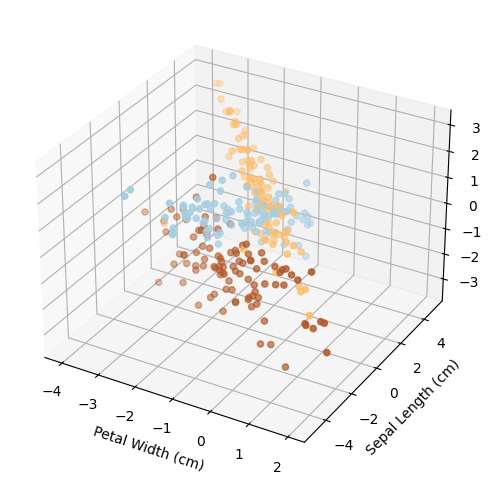

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Criar um conjunto de dados de classificação com 3 classes e 3 atributos
X, y = make_classification(n_samples=300, n_features=3, n_informative=3,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1,
                           random_state=42)

# Plotar o conjunto de dados
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired)
ax.set_xlabel('Petal Width (cm)')
ax.set_ylabel('Sepal Length (cm)')
ax.set_zlabel('Sepal Width (cm)')

# Adicionar uma legenda
legend = ax.legend(*scatter.legend_elements(),
                   title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.add_artist(legend)

plt.show()


No notebook Arquitetura.ipynb implementamos uma arquitetura neural utilizando o módulo nn.Sequentual, e também a classe nn.Module, para um problema de classificação com duas classes, onde cada amostra possuía dois atributos. Considere agora o seguinte conjunto de dados para classificação de flores a partir de atributos estruturais:

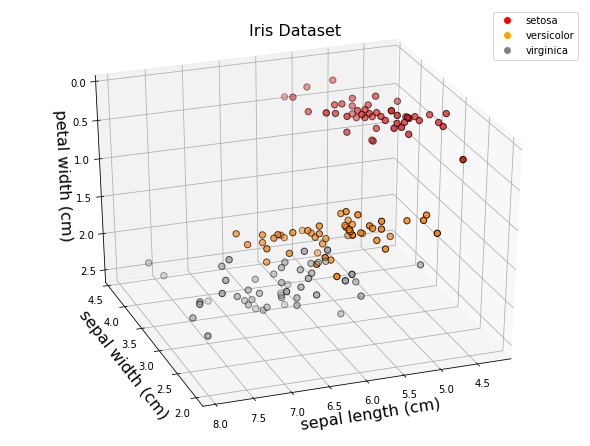

Implemente, usando tanto a implementação do nn.Sequential quanto o nn.Module, uma arquitetura que suporte o treinamento para esse problema de classificação. Sugiro uma arquitetura com uma camada linear escondida com seis neurônios, uma ativação ReLU e uma camada linear de saída.

## nn.Sequencial
A arquitetura abaixo usa nn.Sequencial para modelar o treinamento necessário para o problema. Tendo 3 entradas das diferentes classes(setosa, versicolor, virginica), 6 camadas escondidas  e um output.

In [ ]:
import torch
from  torch import nn # neural networks

input_size = 3
hidden_size = 6
output_size = 1

# camadas e seus tipos
net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # hidden
                    nn.ReLU(), # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output (saída)
print(net)

Sequential(
  (0): Linear(in_features=3, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=1, bias=True)
)


### Foward

In [ ]:
print(X.shape)
tensor = torch.from_numpy(X).float()
pred   = net(tensor)
print(pred.size())

(300, 3)
torch.Size([300, 1])


## Classe nn.Module

A forma mais organizada de usar o pytorch (implementando classes). Para modelos maiores sua importância vai ser ainda mais percebida.

In [ ]:
class redeModule(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(redeModule, self).__init__()

    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):

    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output


instanciando a rede

In [ ]:
input_size = 2
hidden_size = 8
output_size = 1

net = redeModule(input_size,hidden_size, output_size)  ## O método __init__()
print(net)

redeModule(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


### Foward

In [ ]:
print(X.shape)
tensor = torch.from_numpy(X).float()
pred   = net(tensor)
print(pred.size())

(300, 3)
torch.Size([300, 1])
